In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with pd.ExcelFile(r"D:\小鸡理财\百度云同步盘\小鸡理财\数据报告\用户类报告\流失用户分析\流失用户分布.xlsx") as xlsx:
    df_jd_ds = pd.read_excel(xlsx,'经典待收变化')
    df_cg_ds = pd.read_excel(xlsx,'存管待收变化')
    df_vip = pd.read_excel(xlsx,'VIP变动')
    df_tz = pd.read_excel(xlsx,'投资')
    df_members = pd.read_excel(xlsx,'会员列表')
    df_id = pd.read_excel(xlsx,'身份认证')

In [3]:
# df_new_member = pd.read_csv(r'D:\小鸡理财\百度云同步盘\小鸡理财\数据报告\用户类报告\流失用户分析\运营数据.txt',
#                             delimiter="\t",
#                             header=None,
#                             engine = 'python',
#                             names=['用户名','手机号码','身份证'])

身份证标准化

In [4]:
df_jd_ds['id'] = df_jd_ds['身份证'].str.upper()
df_cg_ds['id'] = df_cg_ds['身份证'].str.upper()
df_tz['id'] = df_tz['身份证'].str.upper()
df_members['id'] = df_members['身份证'].str.upper()
df_id['id'] = df_id['身份证'].str.upper()

合并 经典、存管待收变化 表

In [5]:
df_ds = pd.concat([df_jd_ds,df_cg_ds],axis = 0,join='inner')

In [6]:
df_ds.drop(columns=['身份证','用户来源','交易类型'],axis=1,inplace=True)
df_ds.head()

,用户名,真实姓名,待收金额,发生时间,注册时间,id
0,15665886512,王秀珍,41800.00,2018-09-18 09:50:02,2018-01-18 19:04:56,370112198511230029
1,13857836932,徐孟珍,10450.00,2018-09-18 09:50:02,2018-01-17 09:51:01,33021919620422022X
2,13640080755,冯海英,41850.08,2018-09-18 09:50:02,2018-01-09 08:26:39,440106197312094024
3,13712058913,赵世杰,12540.00,2018-09-18 09:50:02,2018-01-06 00:07:28,420624197510072930
4,13857816588,王琼,5226.72,2018-09-18 09:50:02,2018-01-05 11:48:33,330226196304120123


In [7]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185677 entries, 0 to 105587
Data columns (total 6 columns):
用户名     185677 non-null object
真实姓名    185677 non-null object
待收金额    185677 non-null float64
发生时间    185677 non-null datetime64[ns]
注册时间    185677 non-null object
id      185677 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 9.9+ MB


筛选 待收表 中待收0的用户

In [8]:
df_ds_0 = df_ds[df_ds['待收金额'] <= 0.1]

In [9]:
df_ds_0.shape

(5308, 6)

In [10]:
df_ds_0 = df_ds_0.copy()
df_ds_0.sort_values(by=['发生时间','id'],ascending=True,inplace=True)

In [11]:
df_ds_0.head(10)

,用户名,真实姓名,待收金额,发生时间,注册时间,id
46922,fufeifeng,傅飞峰,0.02,2018-03-05 15:05:01,2014-09-03 08:51:17,330281198505176311
46926,aihuahua,施怡,0.01,2018-03-05 15:05:01,2014-09-03 08:30:35,513701199003080324
46877,duanchuanfang1978,端传芳,-0.04,2018-03-05 15:05:02,2015-03-13 11:05:42,32012419780920102X
46862,汤圆12,马金花,0.00,2018-03-05 15:05:02,2015-05-19 09:54:39,330204195101181046
46921,4764603李宁,李晓宁,0.01,2018-03-05 15:05:02,2014-09-03 09:42:21,330205195311050016
46915,qw0509萱萱,吴佩君,0.01,2018-03-05 15:05:02,2014-09-09 13:30:04,330205195512010029
46912,珍惜nb,吴佩芝,0.01,2018-03-05 15:05:02,2014-09-11 12:33:37,330205195911230029
46908,13858289901,隋荣海,-0.02,2018-03-05 15:05:02,2014-09-26 12:17:48,330211198907010059
46900,SandraD,戴娜,0.00,2018-03-05 15:05:02,2014-10-30 19:12:51,330227198310157526
46917,eric-chen,陈波,0.01,2018-03-05 15:05:02,2014-09-04 16:25:07,330227198703254714


查看 在待收变0 后是否还有投资，记录投资金额、投资时间

In [12]:
df_tz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37468 entries, 0 to 37467
Data columns (total 10 columns):
用户名      37468 non-null object
真实姓名     37468 non-null object
手机号码     37468 non-null int64
身份证      37468 non-null object
注册时间     37468 non-null object
计划期限     37468 non-null object
总投资金额    37468 non-null float64
投资时间     37468 non-null datetime64[ns]
投资来源     37468 non-null object
id       37468 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 2.9+ MB


In [13]:
df_tz.sort_values(by=['投资时间','id'],ascending=True,inplace=True)

In [14]:
df_tz.drop(columns=['身份证'],axis=1,inplace=True)
df_tz.head(10)

,用户名,真实姓名,手机号码,注册时间,计划期限,总投资金额,投资时间,投资来源,id
18154,XJLC_30909579286b935,王惠英,15384149920,2016-02-29,6月,20000.0,2018-03-01 06:38:32,安卓端,330622196611042221
18153,XJLC_130871071786e,席翔峰,15857443323,2014-09-04,12月,1000.0,2018-03-01 07:38:47,安卓端,622101195502250758
18152,XJLC_89216200938703f8,韦卓,13772150570,2017-07-28,6月,900.0,2018-03-01 08:28:43,安卓端,610115198403175025
31087,XJLC_959651459155965c,涂玉群,13650519385,2017-03-21 15:18,3月,20000.0,2018-03-01 08:59:28,苹果端,510282198111152720
18151,XJLC_23512231321d1f30,周雪梅,13957832139,2018-02-02,6月,8000.0,2018-03-01 09:11:37,安卓端,330204198212036021
18150,XJLC_23512231321d1f30,周雪梅,13957832139,2018-02-02,6月,2000.0,2018-03-01 09:13:15,安卓端,330204198212036021
18149,XJLC_5681513924302484,孙秀刚,13516349580,2017-02-03,6月,5000.0,2018-03-01 09:30:14,安卓端,370919196103030916
18148,XJLC_23512231321d1f30,周雪梅,13957832139,2018-02-02,6月,12800.0,2018-03-01 09:36:08,安卓端,330204198212036021
31086,XJLC_744438970ef8f5,张慧慧,18458696590,2015-08-05 15:04,3月,10000.0,2018-03-01 09:38:53,安卓端,341202199105253121
31085,XJLC_23512231321d1f30,周雪梅,13957832139,2018-02-02 13:53,3月,30000.0,2018-03-01 09:40:42,安卓端,330204198212036021


In [15]:
df_ds_0.dtypes

用户名             object
真实姓名            object
待收金额           float64
发生时间    datetime64[ns]
注册时间            object
id              object
dtype: object

In [16]:
df_tz.dtypes

用户名              object
真实姓名             object
手机号码              int64
注册时间             object
计划期限             object
总投资金额           float64
投资时间     datetime64[ns]
投资来源             object
id               object
dtype: object

In [17]:
df_0_invest = pd.merge_asof(df_ds_0,df_tz,
                            by = 'id',
                            left_on = '发生时间',
                            right_on = '投资时间',
                            suffixes=('_待收', '_投资'),
                            direction='forward')

In [18]:
df_0_invest.shape

(5308, 14)

In [19]:
df_0_invest.drop(columns=['用户名_投资','真实姓名_投资', '手机号码', '注册时间_投资'],axis=1,inplace=True)
df_0_invest.head()

,用户名_待收,真实姓名_待收,待收金额,发生时间,注册时间_待收,id,计划期限,总投资金额,投资时间,投资来源
0,fufeifeng,傅飞峰,0.02,2018-03-05 15:05:01,2014-09-03 08:51:17,330281198505176311,6月,600.0,2018-03-06 11:45:07,Web端
1,aihuahua,施怡,0.01,2018-03-05 15:05:01,2014-09-03 08:30:35,513701199003080324,NaN,NaN,NaT,NaN
2,duanchuanfang1978,端传芳,-0.04,2018-03-05 15:05:02,2015-03-13 11:05:42,32012419780920102X,3月,2900.0,2018-08-21 13:51:23,微信端
3,汤圆12,马金花,0.00,2018-03-05 15:05:02,2015-05-19 09:54:39,330204195101181046,NaN,NaN,NaT,NaN
4,4764603李宁,李晓宁,0.01,2018-03-05 15:05:02,2014-09-03 09:42:21,330205195311050016,NaN,NaN,NaT,NaN


In [1]:
timediff = pd.Timedelta(30,unit = 'd')

NameError: name 'pd' is not defined

In [ ]:
#如果待收变0的用户都不复投，则其流失时间是：
df_0_invest['预计流失时间'] = df_0_invest['发生时间'] + timediff

In [20]:
# df_0_invest.to_excel('zero_to_invest.xlsx',index=False)

待收0后的再投资时间间隔

In [21]:
df_reinvest = df_0_invest.loc[df_0_invest['投资时间'].notnull(),:]

In [22]:
df_reinvest.head(10)

,用户名_待收,真实姓名_待收,待收金额,发生时间,注册时间_待收,id,计划期限,总投资金额,投资时间,投资来源
0,fufeifeng,傅飞峰,0.02,2018-03-05 15:05:01,2014-09-03 08:51:17,330281198505176311,6月,600.0,2018-03-06 11:45:07,Web端
2,duanchuanfang1978,端传芳,-0.04,2018-03-05 15:05:02,2015-03-13 11:05:42,32012419780920102X,3月,2900.0,2018-08-21 13:51:23,微信端
8,SandraD,戴娜,0.00,2018-03-05 15:05:02,2014-10-30 19:12:51,330227198310157526,6月,50000.0,2018-03-06 17:22:32,安卓端
14,coffee7088,黄玉莹,0.00,2018-03-05 15:05:02,2014-12-14 23:35:08,452701197010210047,1月,100.0,2018-08-21 10:06:54,安卓端
17,18657458818,戴姣娆,0.00,2018-03-05 15:05:03,2015-09-14 15:34:47,330211197310250020,6月,28300.0,2018-04-29 10:30:48,苹果端
19,13967866947,范光琳,0.00,2018-03-05 15:05:03,2015-09-14 16:07:18,330226198008316075,3月,29000.0,2018-03-09 16:48:52,微信端
23,13777074103,徐永华,0.00,2018-03-05 15:05:04,2015-09-21 19:00:19,230102197709114842,6月,40000.0,2018-04-29 11:57:17,苹果端
25,1027970335,蒋佳瑶,0.00,2018-03-05 15:05:04,2015-10-22 16:55:19,330682199410034444,3月,100.0,2018-09-26 14:25:21,安卓端
26,angel830701,何颖,0.00,2018-03-05 15:05:04,2015-10-11 19:01:22,330719198307016367,6月,10000.0,2018-05-08 09:56:30,苹果端
27,俞夏琛,俞夏琛,0.00,2018-03-05 15:05:04,2015-11-16 08:36:39,330781199409202622,12月,5000.0,2018-03-09 10:04:31,微信端


In [23]:
time_gap = (df_reinvest['投资时间'] - df_reinvest['发生时间']).dt.days

In [24]:
type(time_gap)

pandas.core.series.Series

In [25]:
time_gap.shape

(2120,)

In [26]:
time_gap.head()

0       0
2     168
8       1
14    168
17     54
dtype: int64

In [27]:
time_gap_percent = time_gap.value_counts(normalize = True)

In [28]:
time_gap_counts = time_gap.value_counts()

In [29]:
time_gap_frequence = pd.concat([time_gap_counts,time_gap_percent],axis=1)

In [30]:
time_gap_frequence.rename(columns={0:'counts',1:'freq'},inplace=True)

In [31]:
time_gap_frequence.sort_index(inplace=True)

In [32]:
time_gap_frequence.head(10)

,counts,freq
0,591,0.278774
1,138,0.065094
2,94,0.044340
3,93,0.043868
4,67,0.031604
5,71,0.033491
6,52,0.024528
7,35,0.016509
8,43,0.020283
9,42,0.019811


In [33]:
type(time_gap_frequence)

pandas.core.frame.DataFrame

In [34]:
time_gap_frequence['freq_cum'] = time_gap_frequence['freq'].cumsum()

In [35]:
time_gap_frequence.head(10)

,counts,freq,freq_cum
0,591,0.278774,0.278774
1,138,0.065094,0.343868
2,94,0.044340,0.388208
3,93,0.043868,0.432075
4,67,0.031604,0.463679
5,71,0.033491,0.497170
6,52,0.024528,0.521698
7,35,0.016509,0.538208
8,43,0.020283,0.558491
9,42,0.019811,0.578302


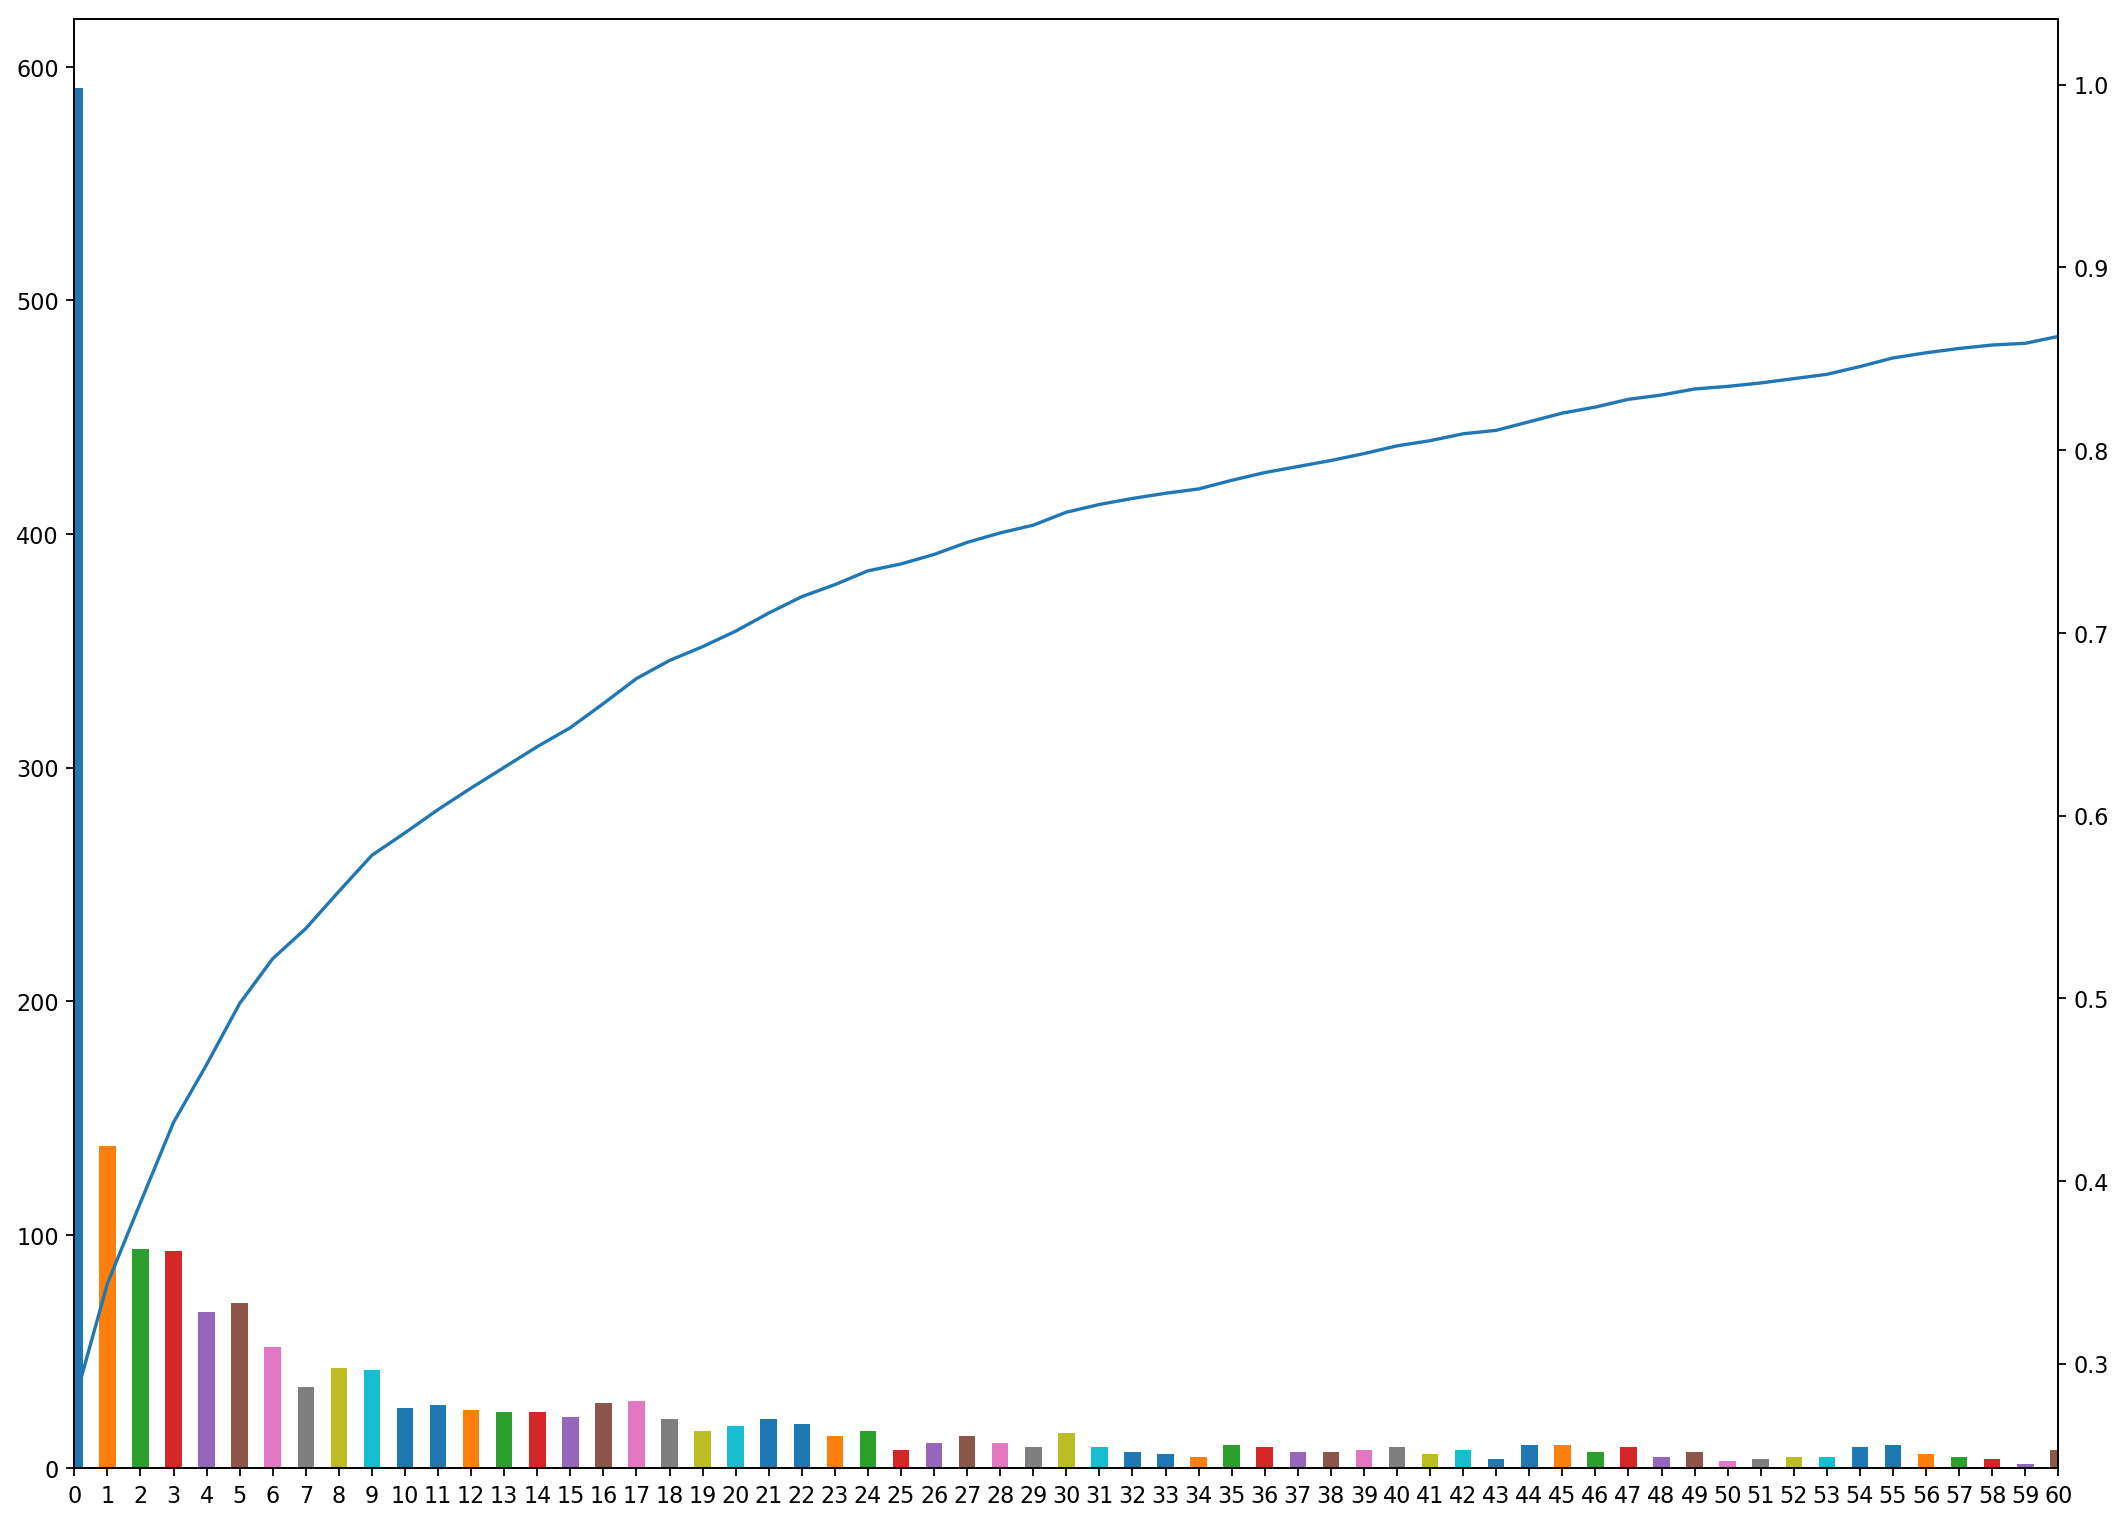

In [38]:
plt.figure(figsize=(16,12), dpi=160)
# width = .35 # width of a bar

time_gap_frequence['counts'].plot(kind='bar')
time_gap_frequence['freq_cum'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim(0,60)

plt.show()

结论：

1、待收变0后的第30天起没有再投资转为流失用户

2、待收变0后的第30天起又有投资，即转为激活用户

### 流失用户分析

流失用户有哪些

In [39]:
timediff = pd.Timedelta(30,unit = 'd')

In [40]:
df_0_invest['预计流失时间'] = df_0_invest['发生时间'] + timediff

In [41]:
df_0_invest.head()

,用户名_待收,真实姓名_待收,待收金额,发生时间,注册时间_待收,id,计划期限,总投资金额,投资时间,投资来源,预计流失时间
0,fufeifeng,傅飞峰,0.02,2018-03-05 15:05:01,2014-09-03 08:51:17,330281198505176311,6月,600.0,2018-03-06 11:45:07,Web端,2018-04-04 15:05:01
1,aihuahua,施怡,0.01,2018-03-05 15:05:01,2014-09-03 08:30:35,513701199003080324,NaN,NaN,NaT,NaN,2018-04-04 15:05:01
2,duanchuanfang1978,端传芳,-0.04,2018-03-05 15:05:02,2015-03-13 11:05:42,32012419780920102X,3月,2900.0,2018-08-21 13:51:23,微信端,2018-04-04 15:05:02
3,汤圆12,马金花,0.00,2018-03-05 15:05:02,2015-05-19 09:54:39,330204195101181046,NaN,NaN,NaT,NaN,2018-04-04 15:05:02
4,4764603李宁,李晓宁,0.01,2018-03-05 15:05:02,2014-09-03 09:42:21,330205195311050016,NaN,NaN,NaT,NaN,2018-04-04 15:05:02


In [42]:
df_0_invest.columns

Index(['用户名_待收', '真实姓名_待收', '待收金额', '发生时间', '注册时间_待收', 'id', '计划期限', '总投资金额',
       '投资时间', '投资来源', '预计流失时间'],
      dtype='object')

In [43]:
df_gone = df_0_invest[((df_0_invest['投资时间'] > df_0_invest['预计流失时间']) | (df_0_invest['投资时间'].isnull()))]

In [44]:
df_gone.head()

,用户名_待收,真实姓名_待收,待收金额,发生时间,注册时间_待收,id,计划期限,总投资金额,投资时间,投资来源,预计流失时间
1,aihuahua,施怡,0.01,2018-03-05 15:05:01,2014-09-03 08:30:35,513701199003080324,NaN,NaN,NaT,NaN,2018-04-04 15:05:01
2,duanchuanfang1978,端传芳,-0.04,2018-03-05 15:05:02,2015-03-13 11:05:42,32012419780920102X,3月,2900.0,2018-08-21 13:51:23,微信端,2018-04-04 15:05:02
3,汤圆12,马金花,0.00,2018-03-05 15:05:02,2015-05-19 09:54:39,330204195101181046,NaN,NaN,NaT,NaN,2018-04-04 15:05:02
4,4764603李宁,李晓宁,0.01,2018-03-05 15:05:02,2014-09-03 09:42:21,330205195311050016,NaN,NaN,NaT,NaN,2018-04-04 15:05:02
5,qw0509萱萱,吴佩君,0.01,2018-03-05 15:05:02,2014-09-09 13:30:04,330205195512010029,NaN,NaN,NaT,NaN,2018-04-04 15:05:02


In [45]:
# 流失时间在2018-10-1之前
df_gone = df_gone.loc[df_gone['预计流失时间']<'2018-10-1',:]

In [46]:
# 流失用户名单
df_gone.head()

,用户名_待收,真实姓名_待收,待收金额,发生时间,注册时间_待收,id,计划期限,总投资金额,投资时间,投资来源,预计流失时间
1,aihuahua,施怡,0.01,2018-03-05 15:05:01,2014-09-03 08:30:35,513701199003080324,NaN,NaN,NaT,NaN,2018-04-04 15:05:01
2,duanchuanfang1978,端传芳,-0.04,2018-03-05 15:05:02,2015-03-13 11:05:42,32012419780920102X,3月,2900.0,2018-08-21 13:51:23,微信端,2018-04-04 15:05:02
3,汤圆12,马金花,0.00,2018-03-05 15:05:02,2015-05-19 09:54:39,330204195101181046,NaN,NaN,NaT,NaN,2018-04-04 15:05:02
4,4764603李宁,李晓宁,0.01,2018-03-05 15:05:02,2014-09-03 09:42:21,330205195311050016,NaN,NaN,NaT,NaN,2018-04-04 15:05:02
5,qw0509萱萱,吴佩君,0.01,2018-03-05 15:05:02,2014-09-09 13:30:04,330205195512010029,NaN,NaN,NaT,NaN,2018-04-04 15:05:02


In [47]:
df_gone.shape

(3318, 11)

In [48]:
df_gone.to_excel('user_gone.xlsx',index=False)

哪个月流失最严重

In [ ]:
gp_gone_month = df_gone.resample('M',on='发生时间')['用户名'].nunique()

In [ ]:
gp_gone_month

In [ ]:
gp_gone_month.plot.barh()

流失用户 与 VIP等级 的关系

In [ ]:
df_vip.info()

In [ ]:
df_vip.head()

In [ ]:
df_vip['vip_max'] = np.where(df_vip['变动前等级'] > df_vip['变动后等级'],df_vip['变动前等级'],df_vip['变动后等级'])

In [ ]:
df_vip.sort_values(by=['vip_max'],ascending=False,inplace=True)

In [ ]:
# 每个用户的曾经最高vip等级
df_vip_max = df_vip.drop_duplicates(subset=['用户名'])

In [ ]:
df_vip_max.shape

In [ ]:
df_vip_max.head()

In [ ]:
df_vip_max_0 = df_vip_max.loc[:,['用户名','vip_max']]

In [ ]:
df_gone_vip = pd.merge(df_gone,df_vip_max_0,
                      on='用户名',
                      how='left')

In [ ]:
df_gone_vip['vip_max'].fillna(0,inplace=True)

In [ ]:
df_gone_vip.sort_values(by='vip_max',ascending=False)

In [ ]:
gp_gone_vip = df_gone_vip.groupby([pd.Grouper(key='发生时间', freq='M'), 'vip_max'])['用户名'].nunique()

In [ ]:
gp_gone_vip.unstack()

流失用户 与 注册时间 的关系

In [ ]:
df_gone.dtypes

In [ ]:
df_gone['注册时间_x'] = pd.to_datetime(df_gone['注册时间_x'])

In [ ]:
gp_gone_reg_time = df_gone.groupby([pd.Grouper(key='发生时间', freq='M'),pd.Grouper(key='注册时间_x', freq='Y')])['用户名'].nunique()

In [ ]:
gp_gone_reg_time.unstack()

流失用户 与 注册时间 的关系

In [ ]:
drinks2 = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
%timeit drinks2.head()

In [ ]:
pd.__version__